In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

from subprocess import check_output

<ipython-input-1-b541733213fb>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d yuanjieli/chicago-crime

100% 359M/359M [00:16<00:00, 25.4MB/s]
100% 359M/359M [00:16<00:00, 22.8MB/s]


In [ ]:
!unzip \*.zip && rm* .zip

Archive:  chicago-crime.zip
  inflating: Crimes_-_2001_to_present.csv  
/bin/bash: rm*: command not found


In [ ]:
crime = pd.read_csv('chicago-crime.csv',error_bad_lines=False)

<ipython-input-5-e173e12c9e58>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  crime = pd.read_csv('chicago-crime.csv',error_bad_lines=False)


In [ ]:
crime.shape

(6492089, 22)

In [ ]:
crime.head()

ID Case Number                    Date                  Block  IUCR  \
0  4647369    HM155213  01/31/2006 12:13:05 PM   066XX N BOSWORTH AVE  1811   
1  4647370    HM245080  03/21/2006 07:00:00 PM    062XX S WESTERN AVE  1330   
2  4647372    HM171175  02/09/2006 01:44:41 AM    058XX S SHIELDS AVE  1811   
3  4647373    HM244805  03/21/2006 04:45:00 PM  011XX N SPAULDING AVE  0810   
4  4647374    HM245851  03/21/2006 10:00:00 PM     080XX S DOBSON AVE  0820   

        Primary Type                   Description  \
0          NARCOTICS  POSS: CANNABIS 30GMS OR LESS   
1  CRIMINAL TRESPASS                       TO LAND   
2          NARCOTICS  POSS: CANNABIS 30GMS OR LESS   
3              THEFT                     OVER $500   
4              THEFT                $500 AND UNDER   

                Location Description  Arrest  Domestic  ...  Ward  \
0           SCHOOL, PUBLIC, BUILDING    True     False  ...  40.0   
1     PARKING LOT/GARAGE(NON.RESID.)    True     False  ...  15.0   
2                             STREET    True     False  ...  20.0   
3  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  ...  26.0   
4                             STREET   False     False  ...   8.0   

   Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
0             1.0        18     1164737.0    1944193.0  2006   
1            66.0        26     1161441.0    1863309.0  2006   
2            68.0        18     1174958.0    1866097.0  2006   
3            23.0        06     1154100.0    1907414.0  2006   
4            44.0        06     1184622.0    1851863.0  2006   

               Updated On   Latitude  Longitude                       Location  
0  04/15/2016 08:55:02 AM  42.002478 -87.669297   (42.002478396, -87.66929687)  
1  04/15/2016 08:55:02 AM  41.780595 -87.683676   (41.780595495, -87.68367553)  
2  04/15/2016 08:55:02 AM  41.787955 -87.634037  (41.787955143, -87.634036744)  
3  04/15/2016 08:55:02 AM  41.901774 -87.709415  (41.901774026, -87.709414574)  
4  04/15/2016 08:55:02 AM  41.748675 -87.599049  (41.748674558, -87.599048654)  

[5 rows x 22 columns]

In [ ]:
df = crime.copy()

In [ ]:
df.head()

ID Case Number                    Date                  Block  IUCR  \
0  4647369    HM155213  01/31/2006 12:13:05 PM   066XX N BOSWORTH AVE  1811   
1  4647370    HM245080  03/21/2006 07:00:00 PM    062XX S WESTERN AVE  1330   
2  4647372    HM171175  02/09/2006 01:44:41 AM    058XX S SHIELDS AVE  1811   
3  4647373    HM244805  03/21/2006 04:45:00 PM  011XX N SPAULDING AVE  0810   
4  4647374    HM245851  03/21/2006 10:00:00 PM     080XX S DOBSON AVE  0820   

        Primary Type                   Description  \
0          NARCOTICS  POSS: CANNABIS 30GMS OR LESS   
1  CRIMINAL TRESPASS                       TO LAND   
2          NARCOTICS  POSS: CANNABIS 30GMS OR LESS   
3              THEFT                     OVER $500   
4              THEFT                $500 AND UNDER   

                Location Description  Arrest  Domestic  ...  Ward  \
0           SCHOOL, PUBLIC, BUILDING    True     False  ...  40.0   
1     PARKING LOT/GARAGE(NON.RESID.)    True     False  ...  15.0   
2                             STREET    True     False  ...  20.0   
3  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   False     False  ...  26.0   
4                             STREET   False     False  ...   8.0   

   Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
0             1.0        18     1164737.0    1944193.0  2006   
1            66.0        26     1161441.0    1863309.0  2006   
2            68.0        18     1174958.0    1866097.0  2006   
3            23.0        06     1154100.0    1907414.0  2006   
4            44.0        06     1184622.0    1851863.0  2006   

               Updated On   Latitude  Longitude                       Location  
0  04/15/2016 08:55:02 AM  42.002478 -87.669297   (42.002478396, -87.66929687)  
1  04/15/2016 08:55:02 AM  41.780595 -87.683676   (41.780595495, -87.68367553)  
2  04/15/2016 08:55:02 AM  41.787955 -87.634037  (41.787955143, -87.634036744)  
3  04/15/2016 08:55:02 AM  41.901774 -87.709415  (41.901774026, -87.709414574)  
4  04/15/2016 08:55:02 AM  41.748675 -87.599049  (41.748674558, -87.599048654)  

[5 rows x 22 columns]

In [ ]:
# convert dates to pandas datetime format
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
df.index = pd.DatetimeIndex(df.Date)

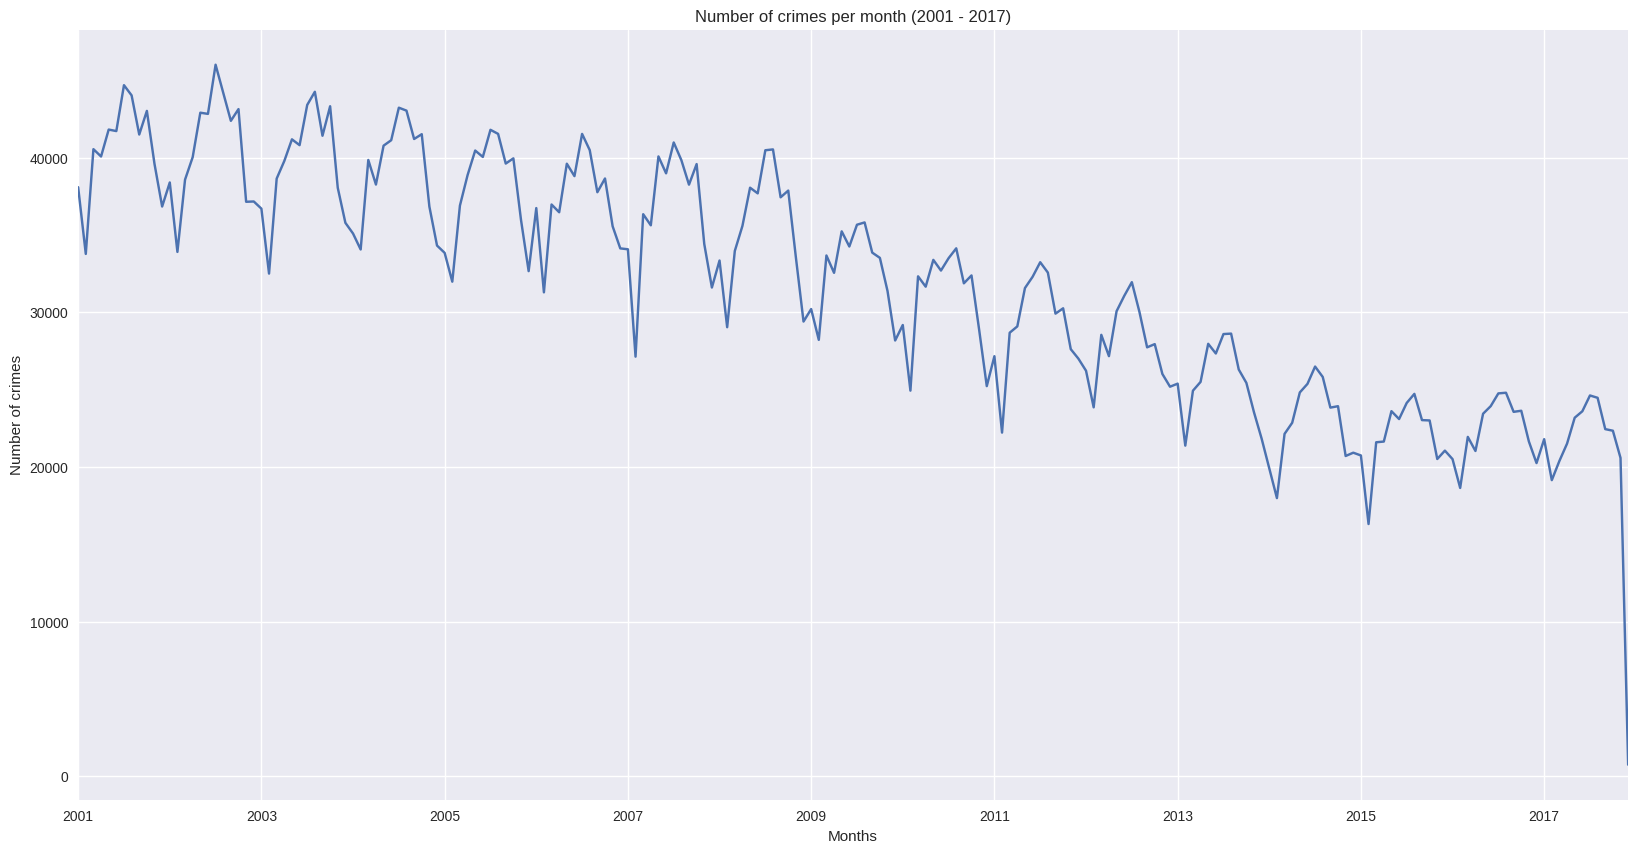

In [ ]:
plt.figure(figsize=(20,10))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2001 - 2017)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

<ipython-input-12-adb157e8da7c>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid','seaborn-paper'])
<ipython-input-12-adb157e8da7c>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid','seaborn-paper'])


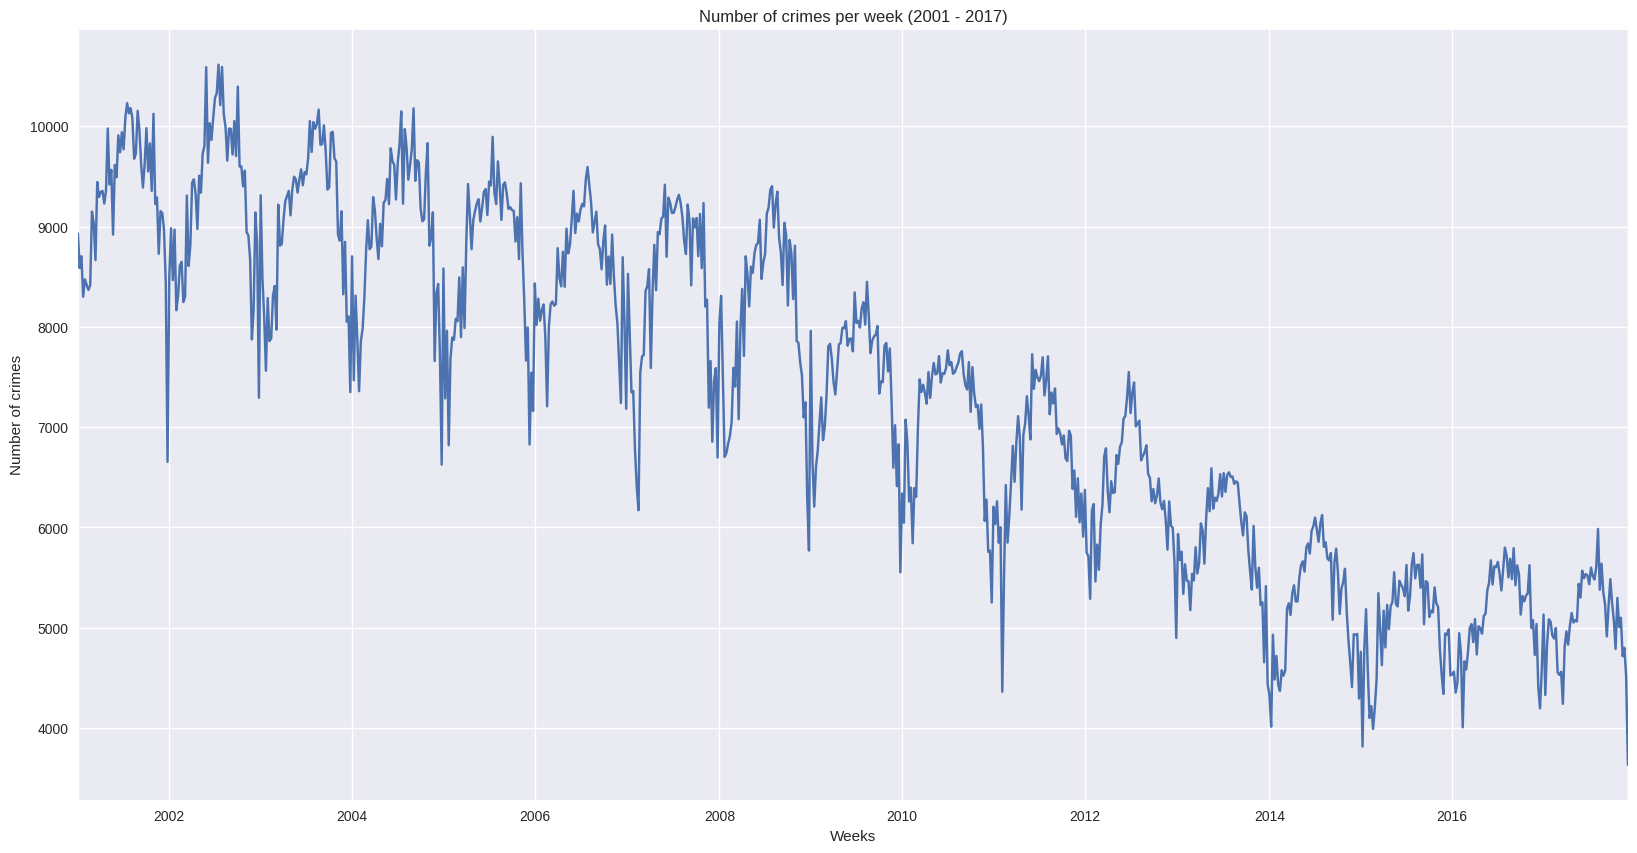

In [ ]:
plt.figure(figsize=(20,10))
df.resample('W').size().plot(legend=False)
plt.title('Number of crimes per week (2001 - 2017)')
plt.xlabel('Weeks')
plt.ylabel('Number of crimes')
plt.style.use(['seaborn-whitegrid','seaborn-paper'])
plt.show()

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


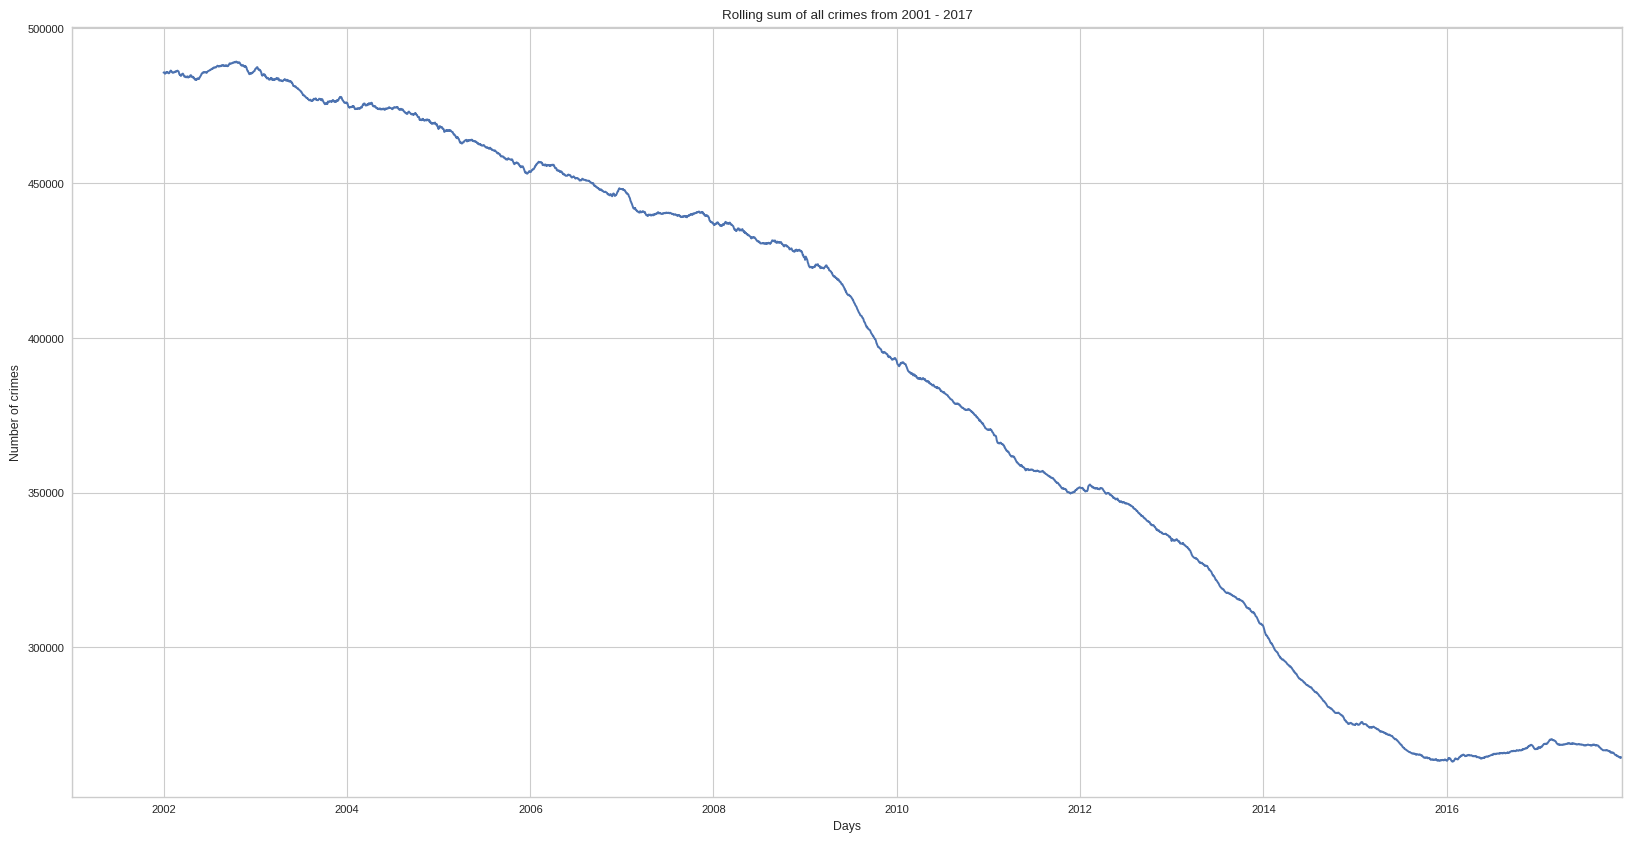

In [ ]:
plt.figure(figsize=(20,10))
df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2001 - 2017')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

<ipython-input-15-621068fd8dca>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-darkgrid'])


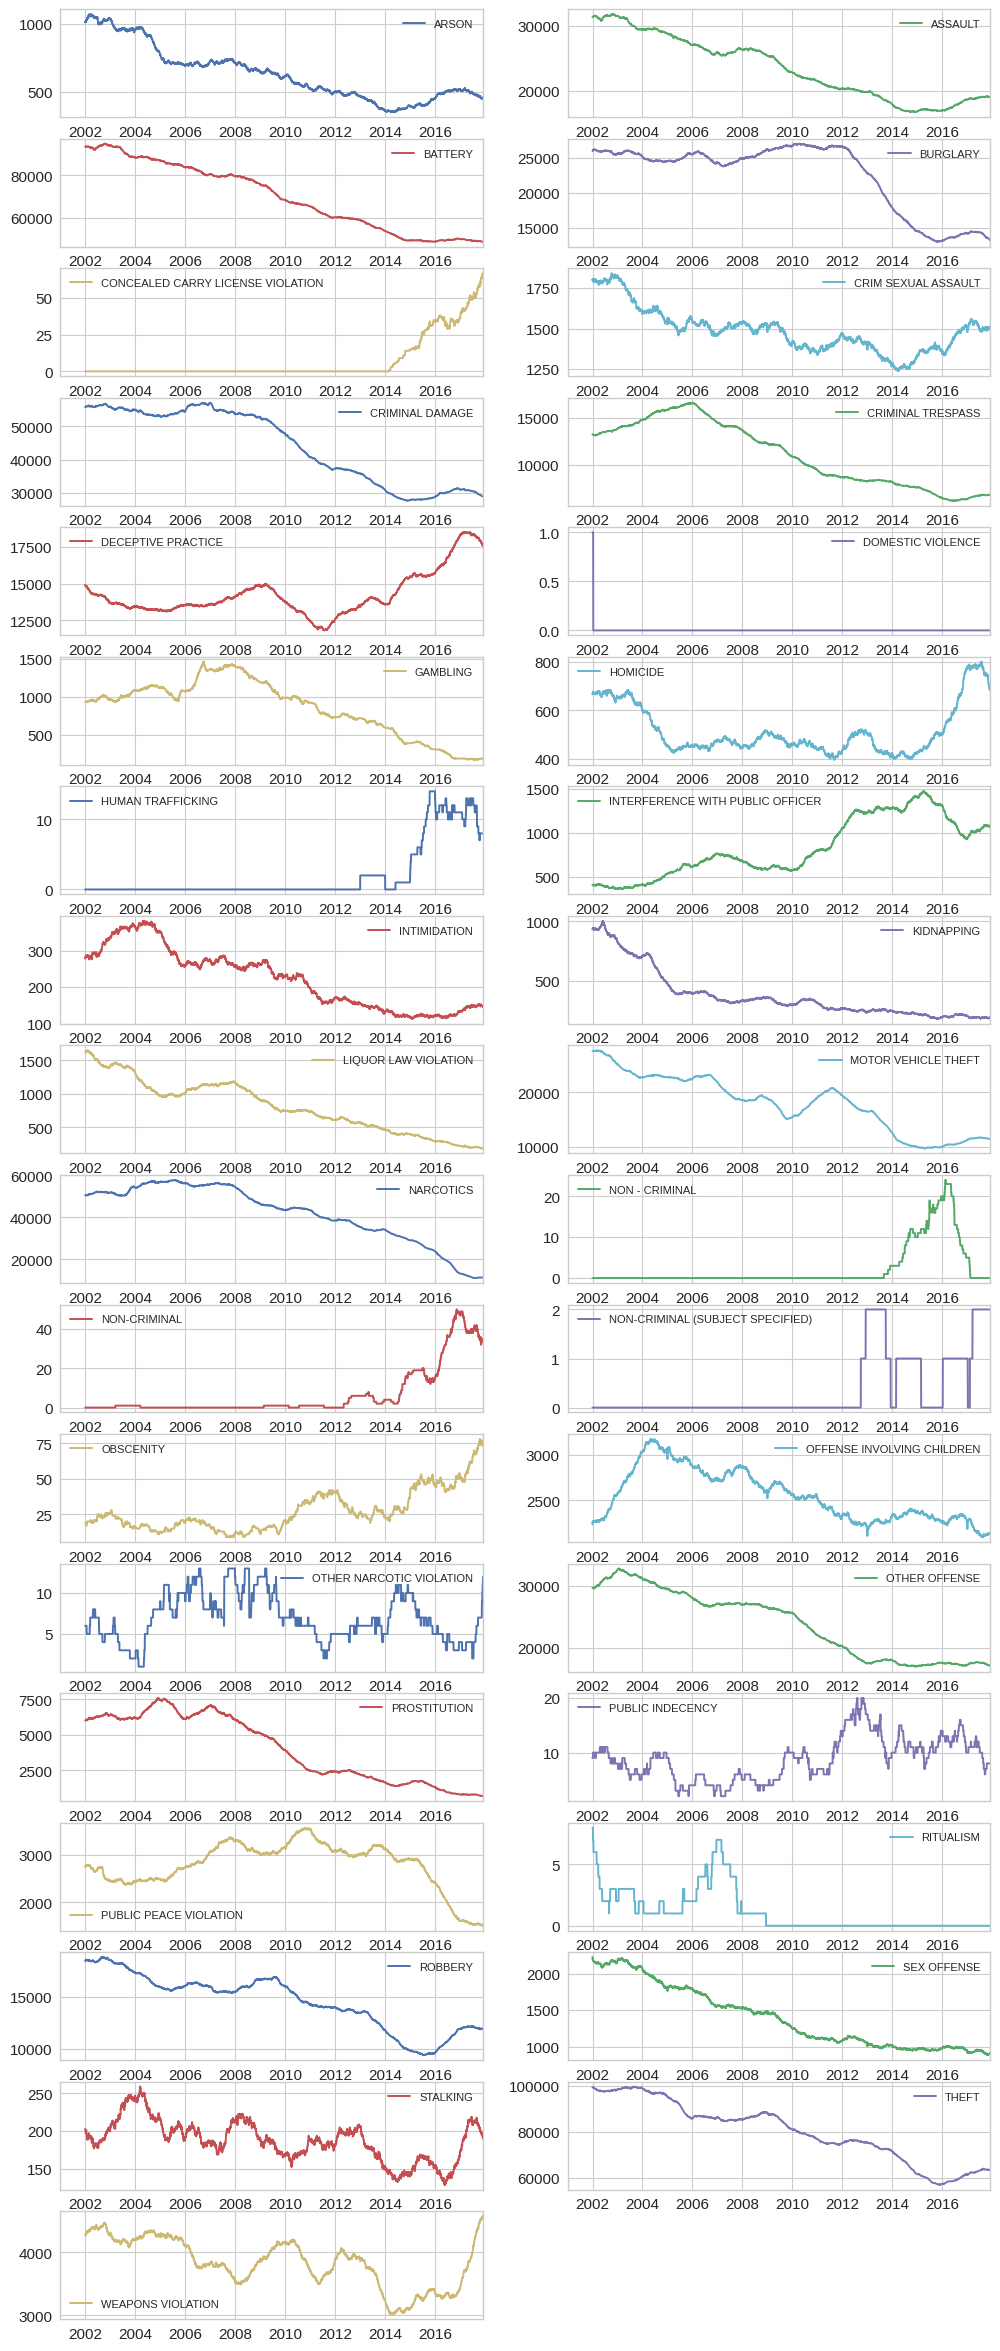

In [ ]:
crimes_count_date = df.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=df.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plot = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 2), sharex=False, sharey=False)
plt.style.use(['seaborn-darkgrid'])

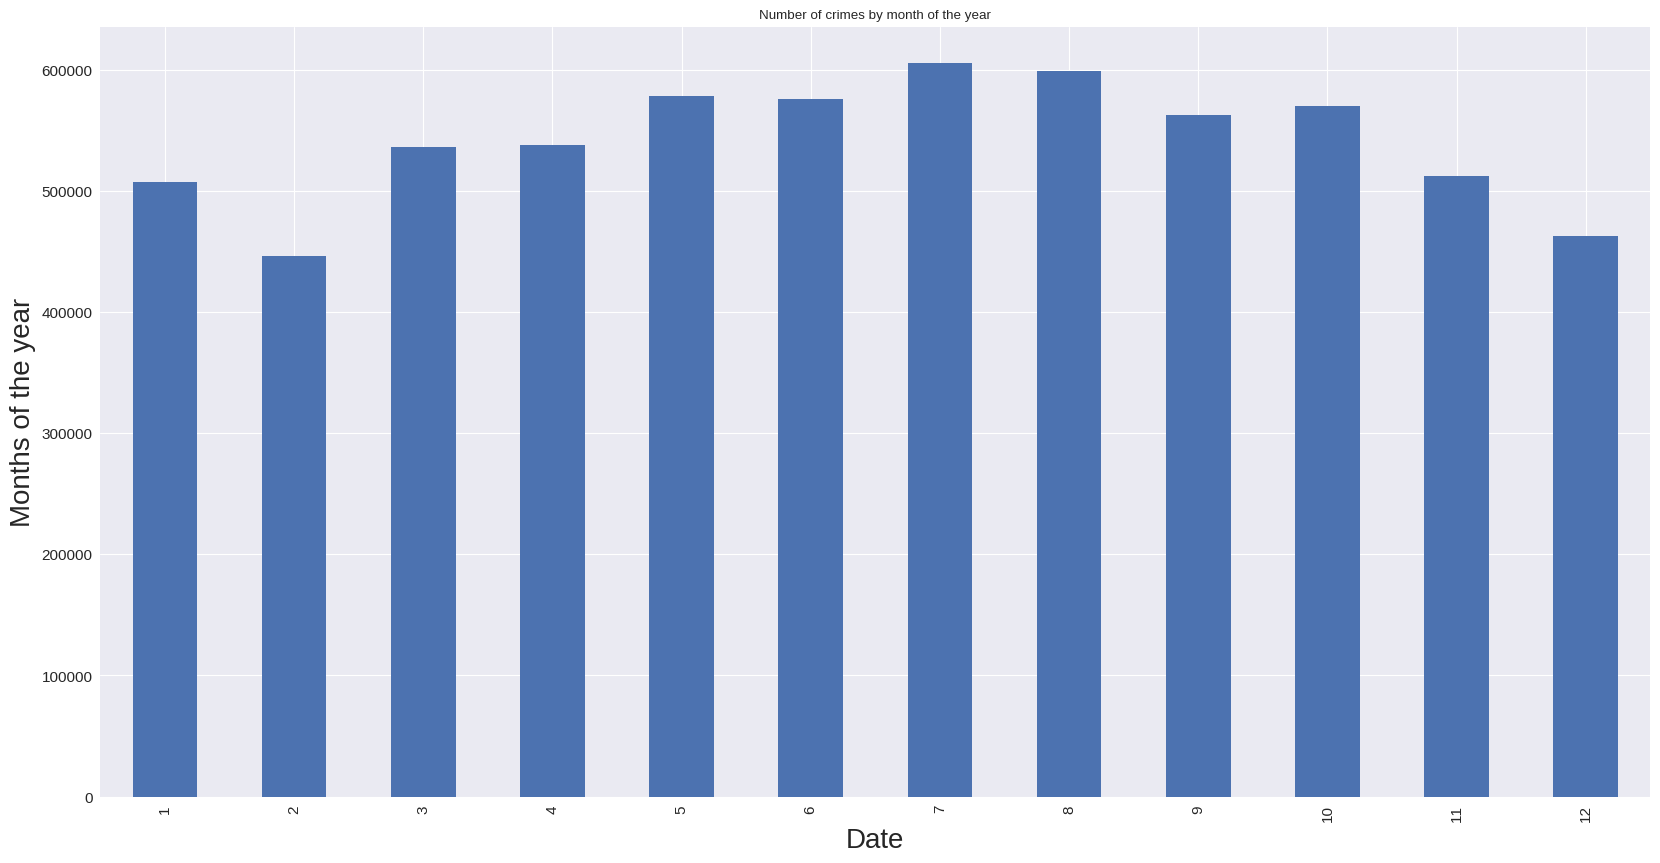

In [ ]:
plt.figure(figsize=(20,10))
plt.ylabel('Months of the year', fontsize=20)
plt.xlabel('Number of crimes', fontsize=20)
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.title('Number of crimes by month of the year')
df.groupby([df.index.month]).size().plot(kind='bar', style=["seaborn-whitegrid"])
plt.show()

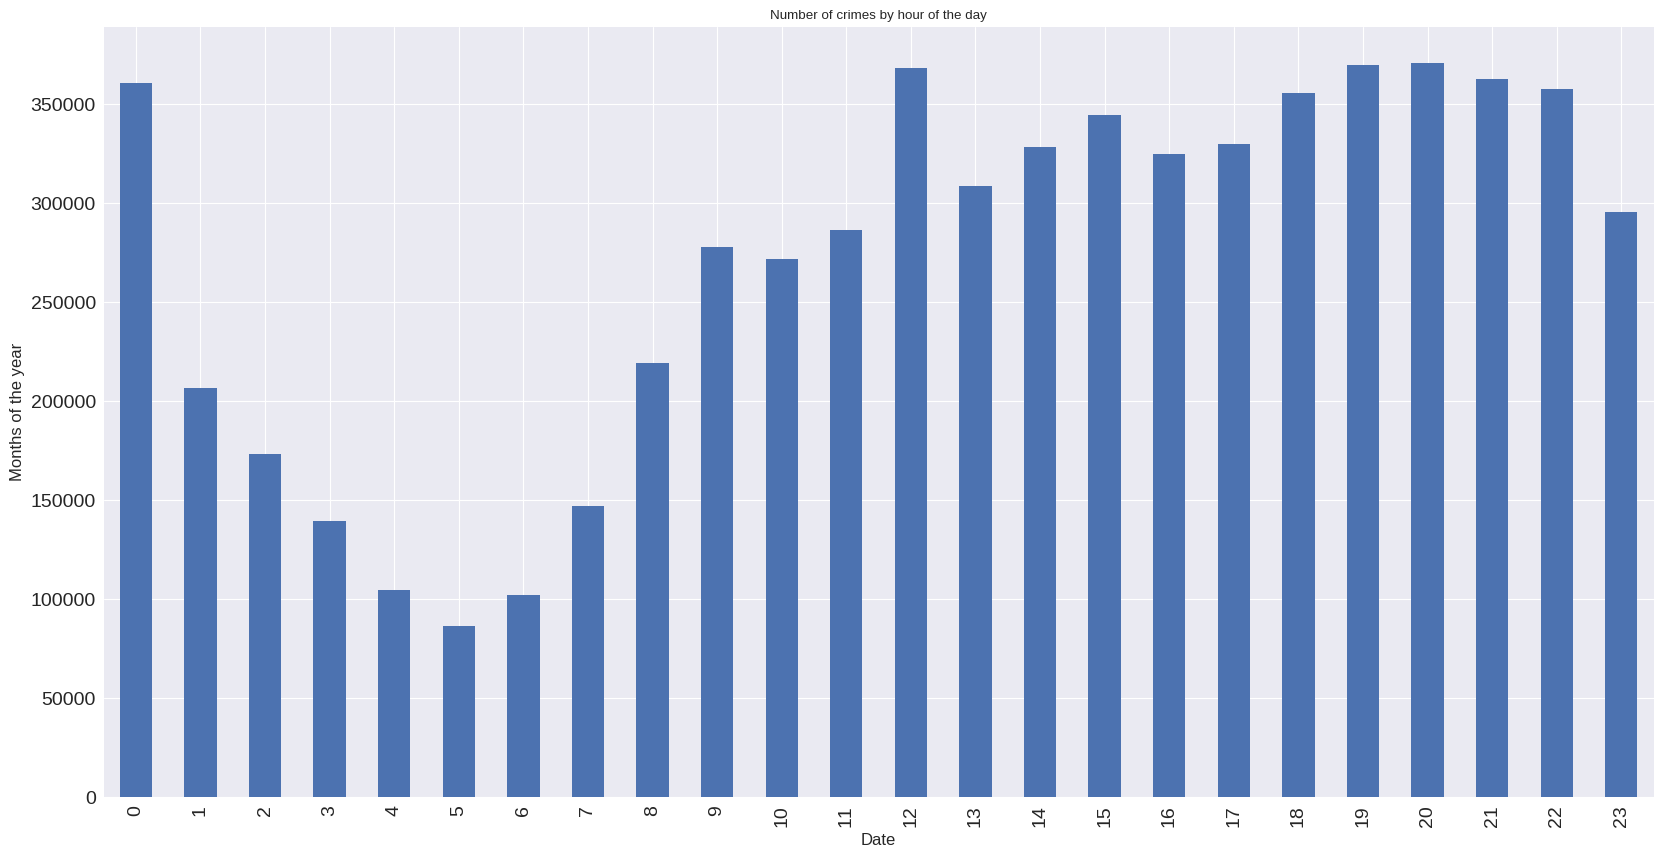

In [ ]:
plt.figure(figsize=(20,10))
plt.ylabel('Months of the year', fontsize=12)
plt.xlabel('Number of crimes', fontsize=12)
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.title('Number of crimes by hour of the day')
df.groupby([df.index.hour]).size().plot(kind='bar', style=["seaborn-whitegrid"])
plt.show()

<ipython-input-18-7d049490cd27>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-darkgrid'])


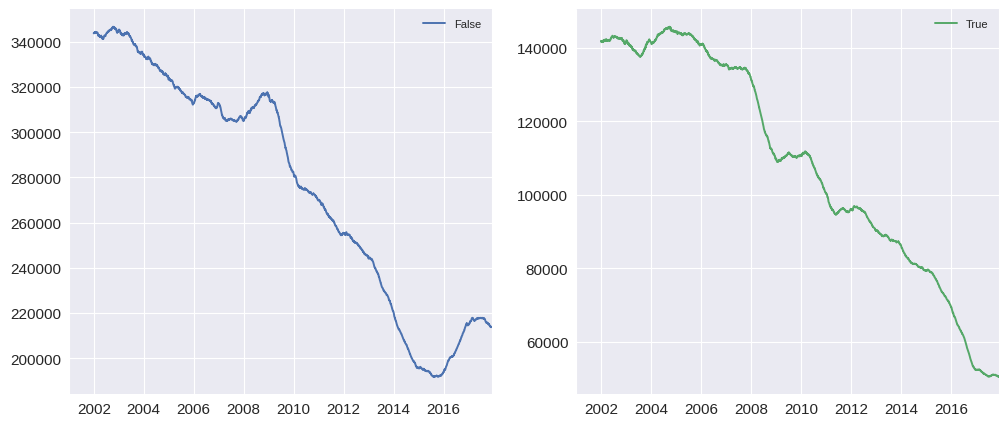

In [ ]:
crimes_count_date = df.pivot_table('ID', aggfunc=np.size, columns='Arrest', index=df.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(365).sum().plot(figsize=(12, 5), subplots=True, layout=(-1, 2), sharex=False, sharey=False)
plt.style.use(['seaborn-darkgrid'])

<ipython-input-19-95b7c7ed4729>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-darkgrid'])


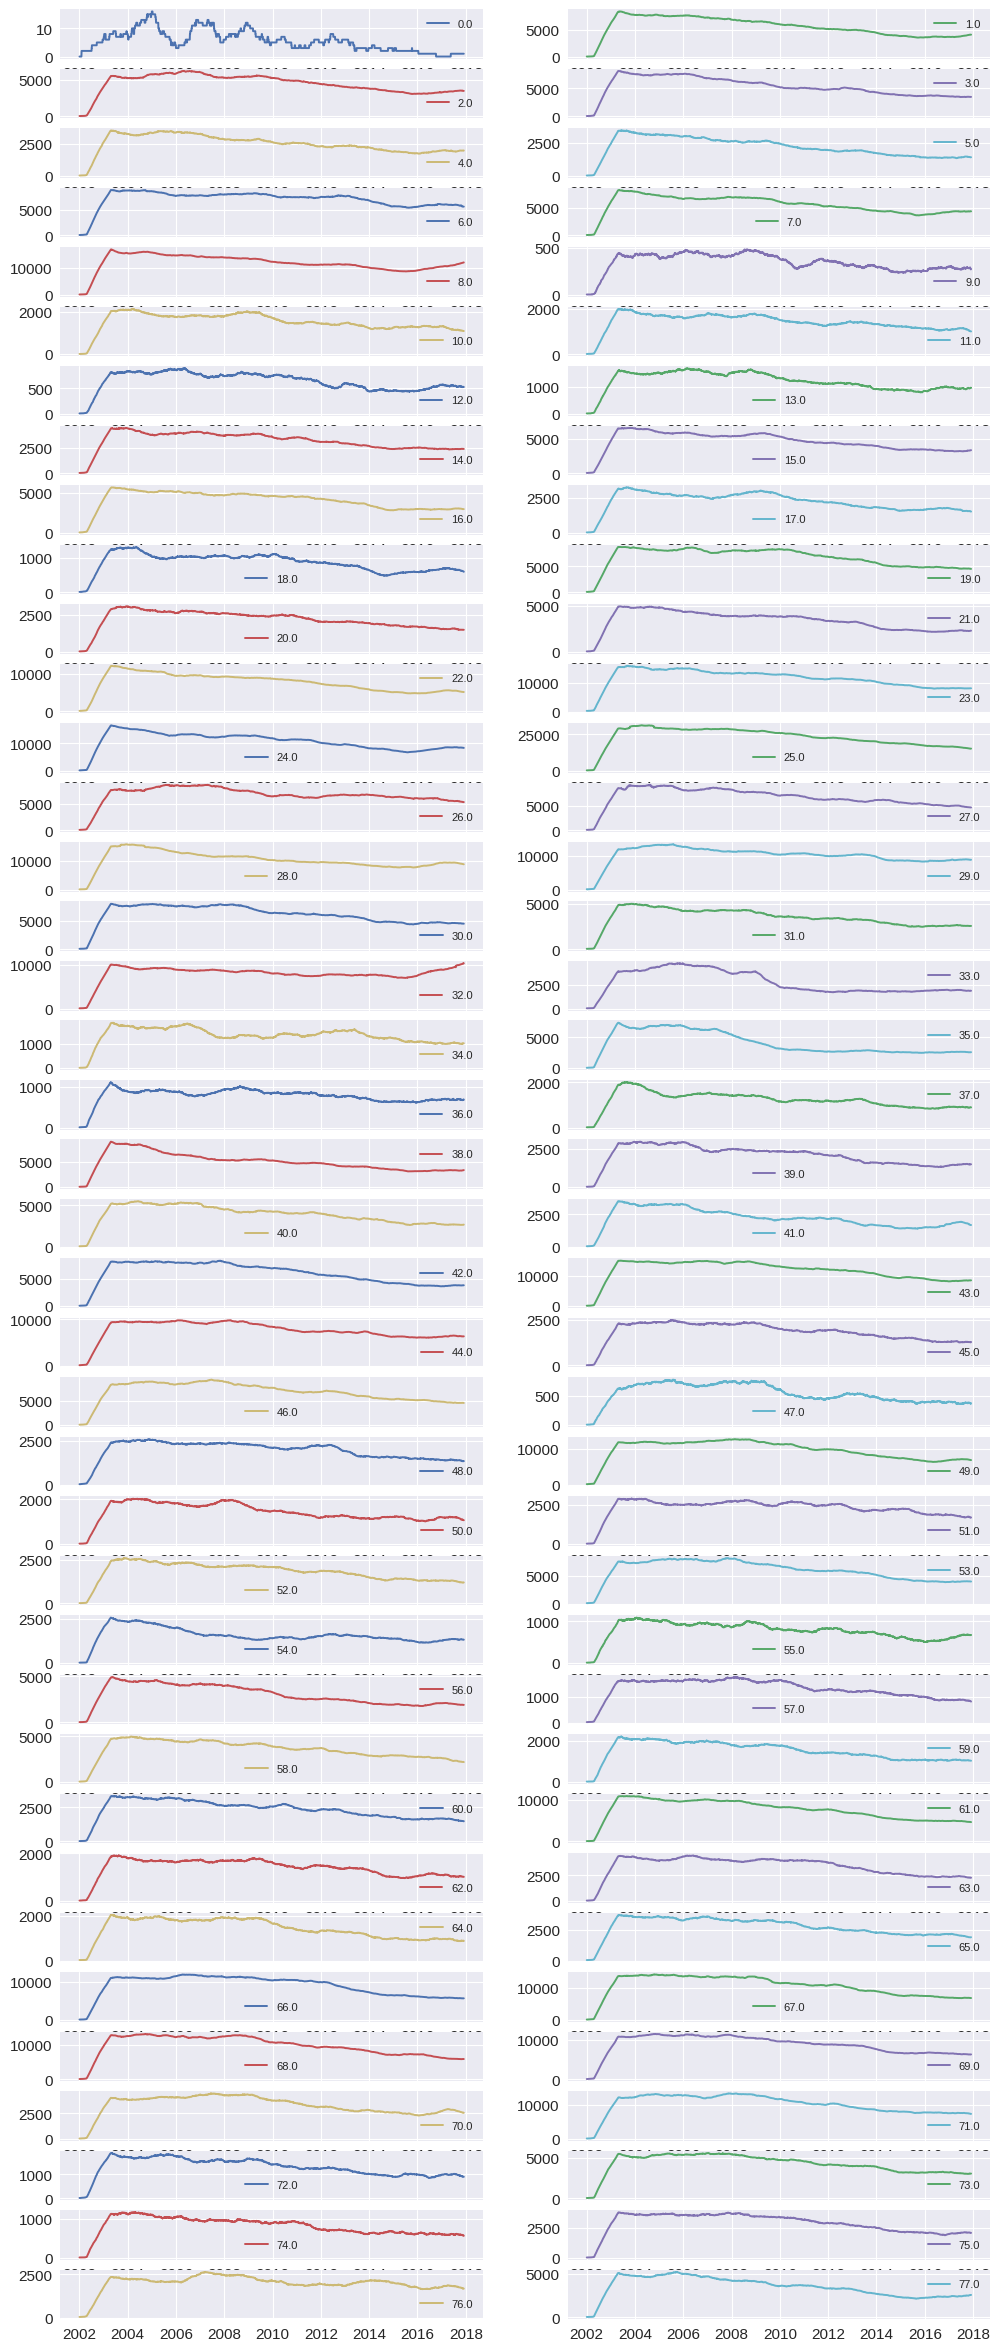

In [ ]:
crimes_count_date = df.pivot_table('ID', aggfunc=np.size, columns='Community Area', index=df.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 2), sharex=False, sharey=False)
plt.style.use(['seaborn-darkgrid'])

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Primary Type', fontsize=20)
crimeType = df.groupby([df['Primary Type']]).size().sort_values(ascending=False).plot(kind='bar', style='seaborn-paper')

In [ ]:
df.groupby([df['Location Description']]).size().sort_values(ascending=False)

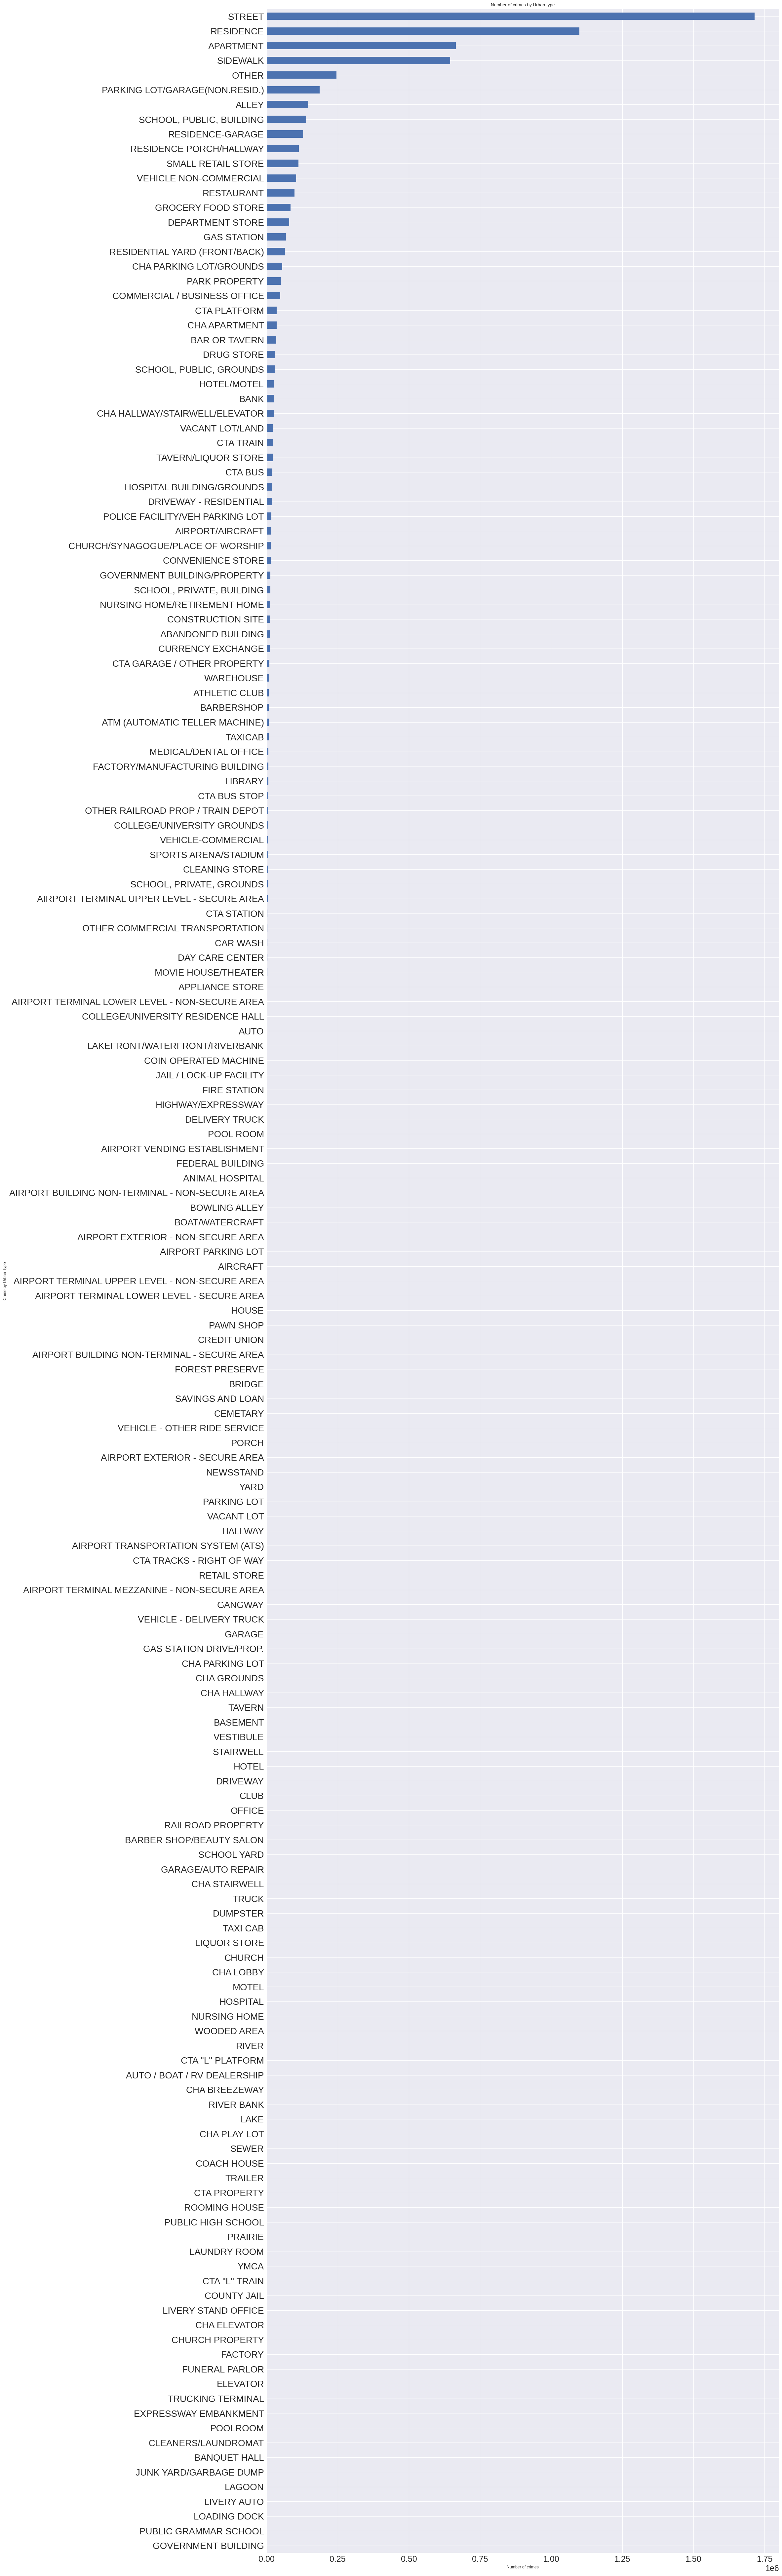

In [ ]:
plt.figure(figsize=(20,100))
df.groupby([df['Location Description']]).size().sort_values(ascending=True).plot(kind='barh', style='seaborn-paper')
plt.title('Number of crimes by Urban type')
plt.ylabel('Crime by Urban Type')
plt.xlabel('Number of crimes')
plt.show()

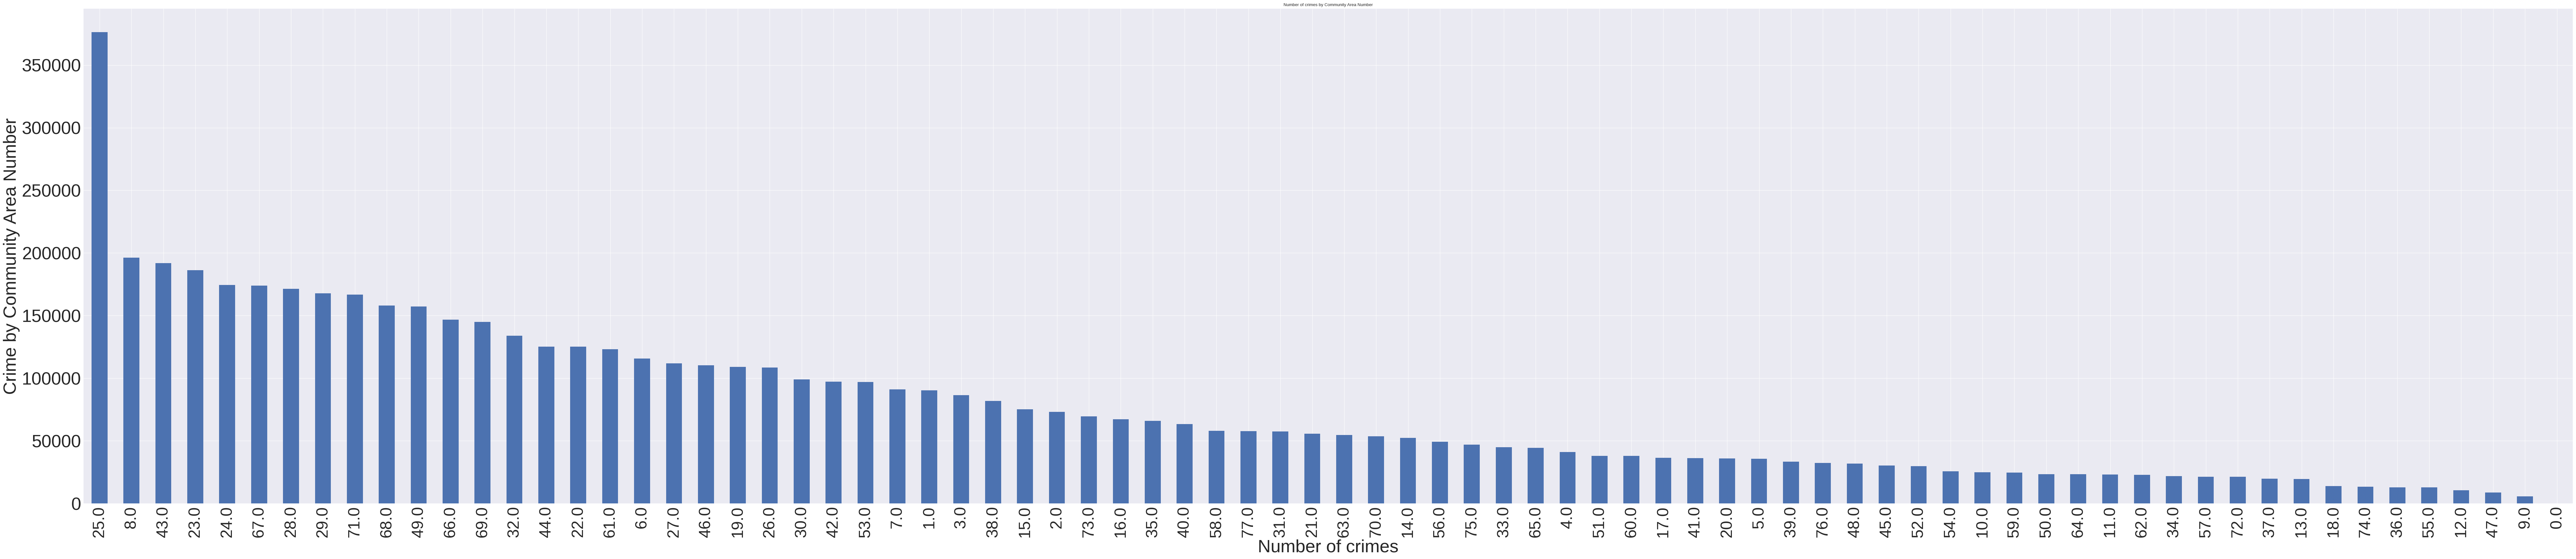

In [ ]:
plt.figure(figsize=(100,20))
plt.rcParams['ytick.labelsize'] = 40
plt.rcParams['xtick.labelsize'] = 36
plt.ylabel('Frequency', fontsize=40)
plt.xlabel('Primary Type', fontsize=40)
df.groupby([df['Community Area']]).size().sort_values(ascending=False).plot(kind='bar', style='seaborn-paper')
plt.title('Number of crimes by Community Area Number')
plt.ylabel('Crime by Community Area Number')
plt.xlabel('Number of crimes')
plt.show()

In [ ]:
types = df.groupby([df['Primary Type']]).size().sort_values(ascending=False)
types

Primary Type
THEFT                                1356412
BATTERY                              1184962
CRIMINAL DAMAGE                       745021
NARCOTICS                             698611
OTHER OFFENSE                         402202
ASSAULT                               399294
BURGLARY                              376806
MOTOR VEHICLE THEFT                   304646
ROBBERY                               246241
DECEPTIVE PRACTICE                    242883
CRIMINAL TRESPASS                     186831
PROSTITUTION                           67666
WEAPONS VIOLATION                      65582
PUBLIC PEACE VIOLATION                 46527
OFFENSE INVOLVING CHILDREN             42910
CRIM SEXUAL ASSAULT                    25383
SEX OFFENSE                            23902
GAMBLING                               14225
INTERFERENCE WITH PUBLIC OFFICER       13911
LIQUOR LAW VIOLATION                   13805
ARSON                                  10812
HOMICIDE                                88

In [ ]:
homicide = df[df["Primary Type"] == 'HOMICIDE'].copy()

In [ ]:
homicide.head()

ID Case Number                Date  \
Date                                                        
2008-09-22 23:24:00  4756    HP587530 2008-09-22 23:24:00   
2008-09-22 23:37:00  4757    HP587531 2008-09-22 23:37:00   
2008-09-23 09:57:00  4758    HP572693 2008-09-23 09:57:00   
2008-09-23 13:40:00  4759    HP588309 2008-09-23 13:40:00   
2008-09-23 20:25:00  4760    HP589244 2008-09-23 20:25:00   

                                            Block  IUCR Primary Type  \
Date                                                                   
2008-09-22 23:24:00            047XX W GLADYS AVE  0110     HOMICIDE   
2008-09-22 23:37:00          022XX S KIRKLAND AVE  0110     HOMICIDE   
2008-09-23 09:57:00  027XX W POPE JOHN PAUL II DR  0110     HOMICIDE   
2008-09-23 13:40:00               056XX W 64TH ST  0110     HOMICIDE   
2008-09-23 20:25:00           088XX S PRAIRIE AVE  0110     HOMICIDE   

                             Description Location Description  Arrest  \
Date                                                                    
2008-09-22 23:24:00  FIRST DEGREE MURDER               STREET   False   
2008-09-22 23:37:00  FIRST DEGREE MURDER               STREET   False   
2008-09-23 09:57:00  FIRST DEGREE MURDER                HOUSE    True   
2008-09-23 13:40:00  FIRST DEGREE MURDER                ALLEY   False   
2008-09-23 20:25:00  FIRST DEGREE MURDER                ALLEY   False   

                     Domestic  ...  Ward  Community Area  FBI Code  \
Date                           ...                                   
2008-09-22 23:24:00     False  ...  24.0            25.0       01A   
2008-09-22 23:37:00     False  ...  22.0            29.0       01A   
2008-09-23 09:57:00      True  ...  12.0            58.0       01A   
2008-09-23 13:40:00     False  ...  13.0            64.0       01A   
2008-09-23 20:25:00     False  ...   6.0            44.0       01A   

                     X Coordinate Y Coordinate  Year              Updated On  \
Date                                                                           
2008-09-22 23:24:00     1144818.0    1897935.0  2008  08/17/2015 03:03:40 PM   
2008-09-22 23:37:00     1147705.0    1888660.0  2008  08/17/2015 03:03:40 PM   
2008-09-23 09:57:00     1158655.0    1876028.0  2008  08/17/2015 03:03:40 PM   
2008-09-23 13:40:00     1139888.0    1861562.0  2008  08/17/2015 03:03:40 PM   
2008-09-23 20:25:00     1179584.0    1846297.0  2008  08/17/2015 03:03:40 PM   

                      Latitude  Longitude                       Location  
Date                                                                      
2008-09-22 23:24:00  41.875943 -87.743748  (41.875942734, -87.743748059)  
2008-09-22 23:37:00  41.850436 -87.733386  (41.850436084, -87.733385899)  
2008-09-23 09:57:00  41.815555 -87.693543  (41.815555438, -87.693542513)  
2008-09-23 13:40:00  41.776221 -87.762736  (41.776221083, -87.762736483)  
2008-09-23 20:25:00  41.733517 -87.617679  (41.733517296, -87.617679154)  

[5 rows x 22 columns]

In [ ]:
homicide.groupby([homicide['Location Description']]).size().sort_values(ascending=False)

Location Description
STREET                       4262
AUTO                         1068
APARTMENT                     749
ALLEY                         567
HOUSE                         498
                             ... 
EXPRESSWAY EMBANKMENT           1
ELEVATOR                        1
POOLROOM                        1
JUNK YARD/GARBAGE DUMP          1
HOSPITAL BUILDING/GROUNDS       1
Length: 89, dtype: int64

<Axes: ylabel='Location Description'>

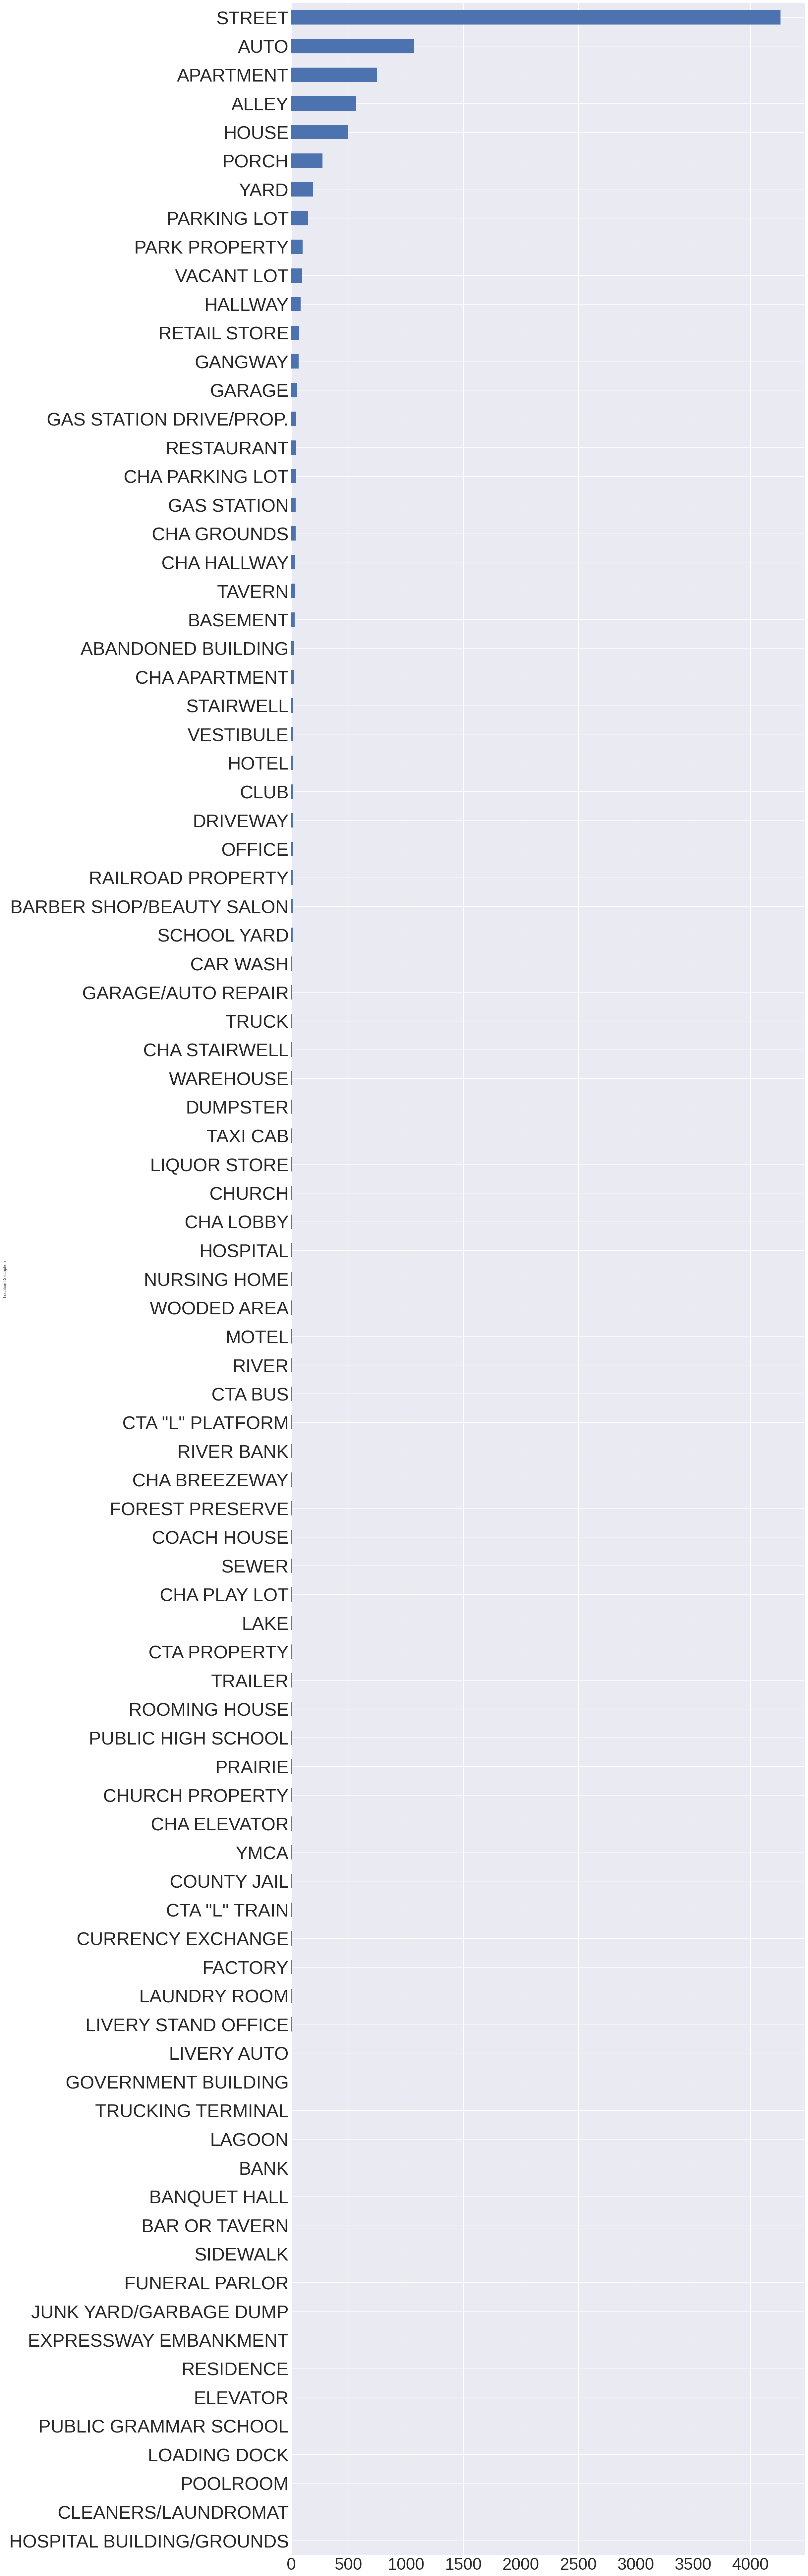

In [ ]:
plt.figure(figsize=(20,100))
homicide.groupby([homicide['Location Description']]).size().sort_values(ascending=True).plot(kind='barh', style='seaborn-paper')

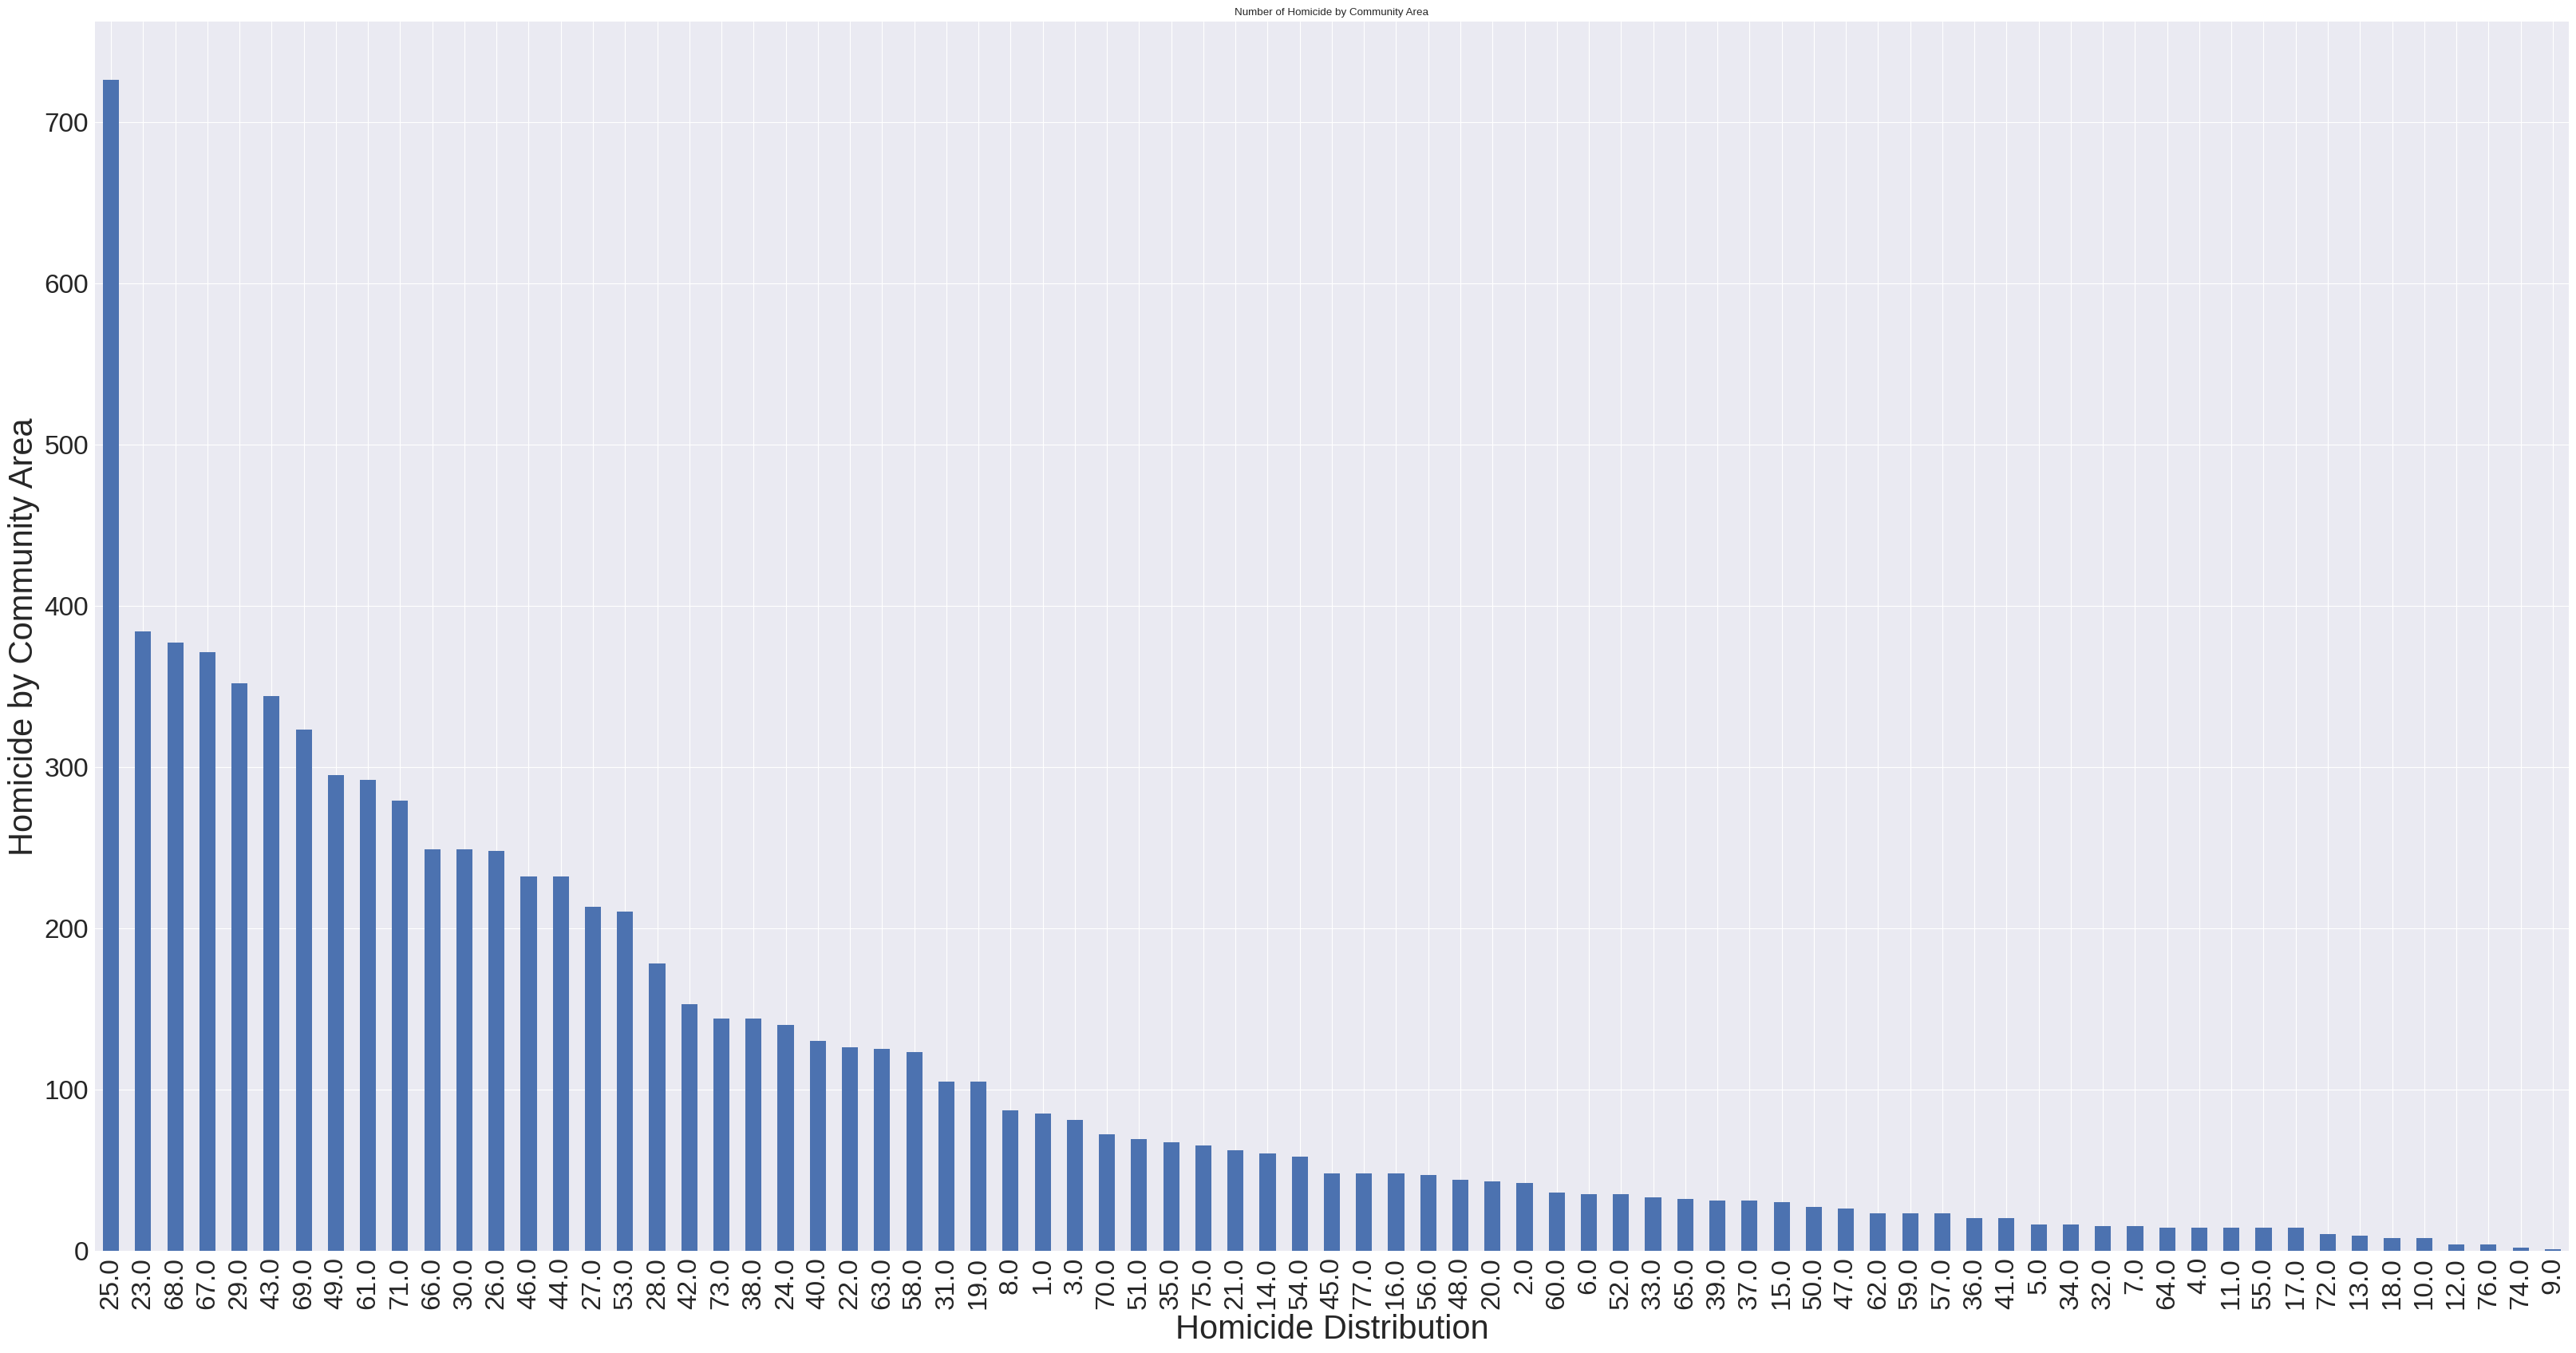

In [ ]:
plt.figure(figsize=(40,20))
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 24
plt.ylabel('Frequency', fontsize=30)
plt.xlabel('Primary Type', fontsize=30)
homicide.groupby([homicide['Community Area']]).size().sort_values(ascending=False).plot(kind='bar', style='seaborn-paper')
plt.title('Number of Homicide by Community Area')
plt.ylabel('Homicide by Community Area',size=30)
plt.xlabel('Homicide Distribution')

plt.show()

In [ ]:
austin = homicide[homicide['Community Area'] == 25.0].copy()

# Homicide Crime in Austin

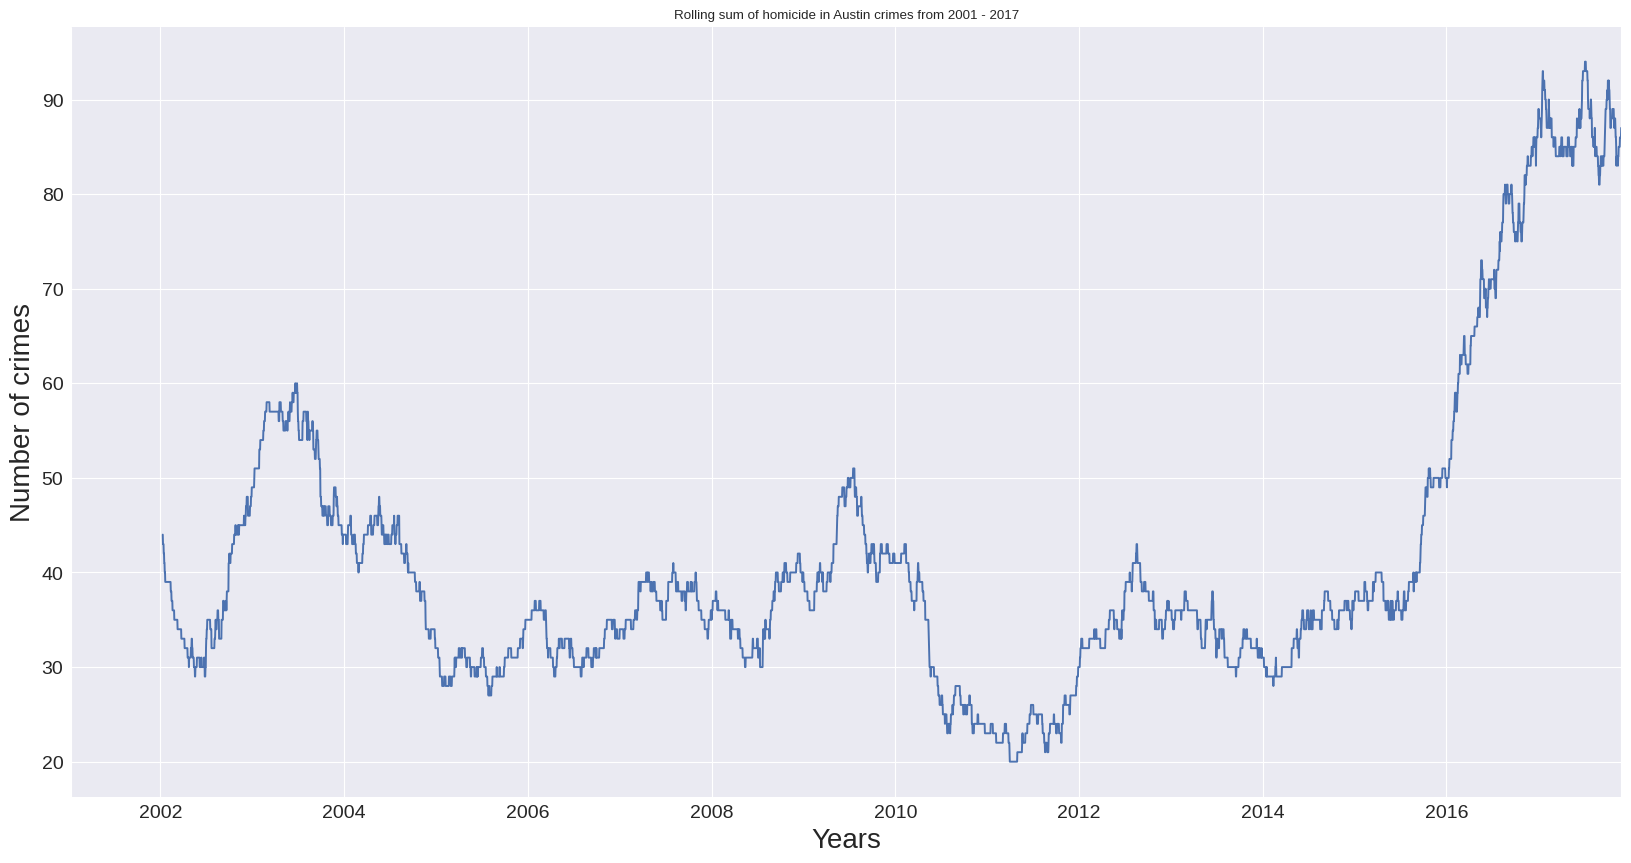

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Primary Type', fontsize=20)
austin.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of homicide in Austin crimes from 2001 - 2017')
plt.ylabel('Number of crimes')
plt.xlabel('Years')
plt.show()

# Homicide distribution by Community 

<ipython-input-32-e02add74d01e>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-darkgrid'])


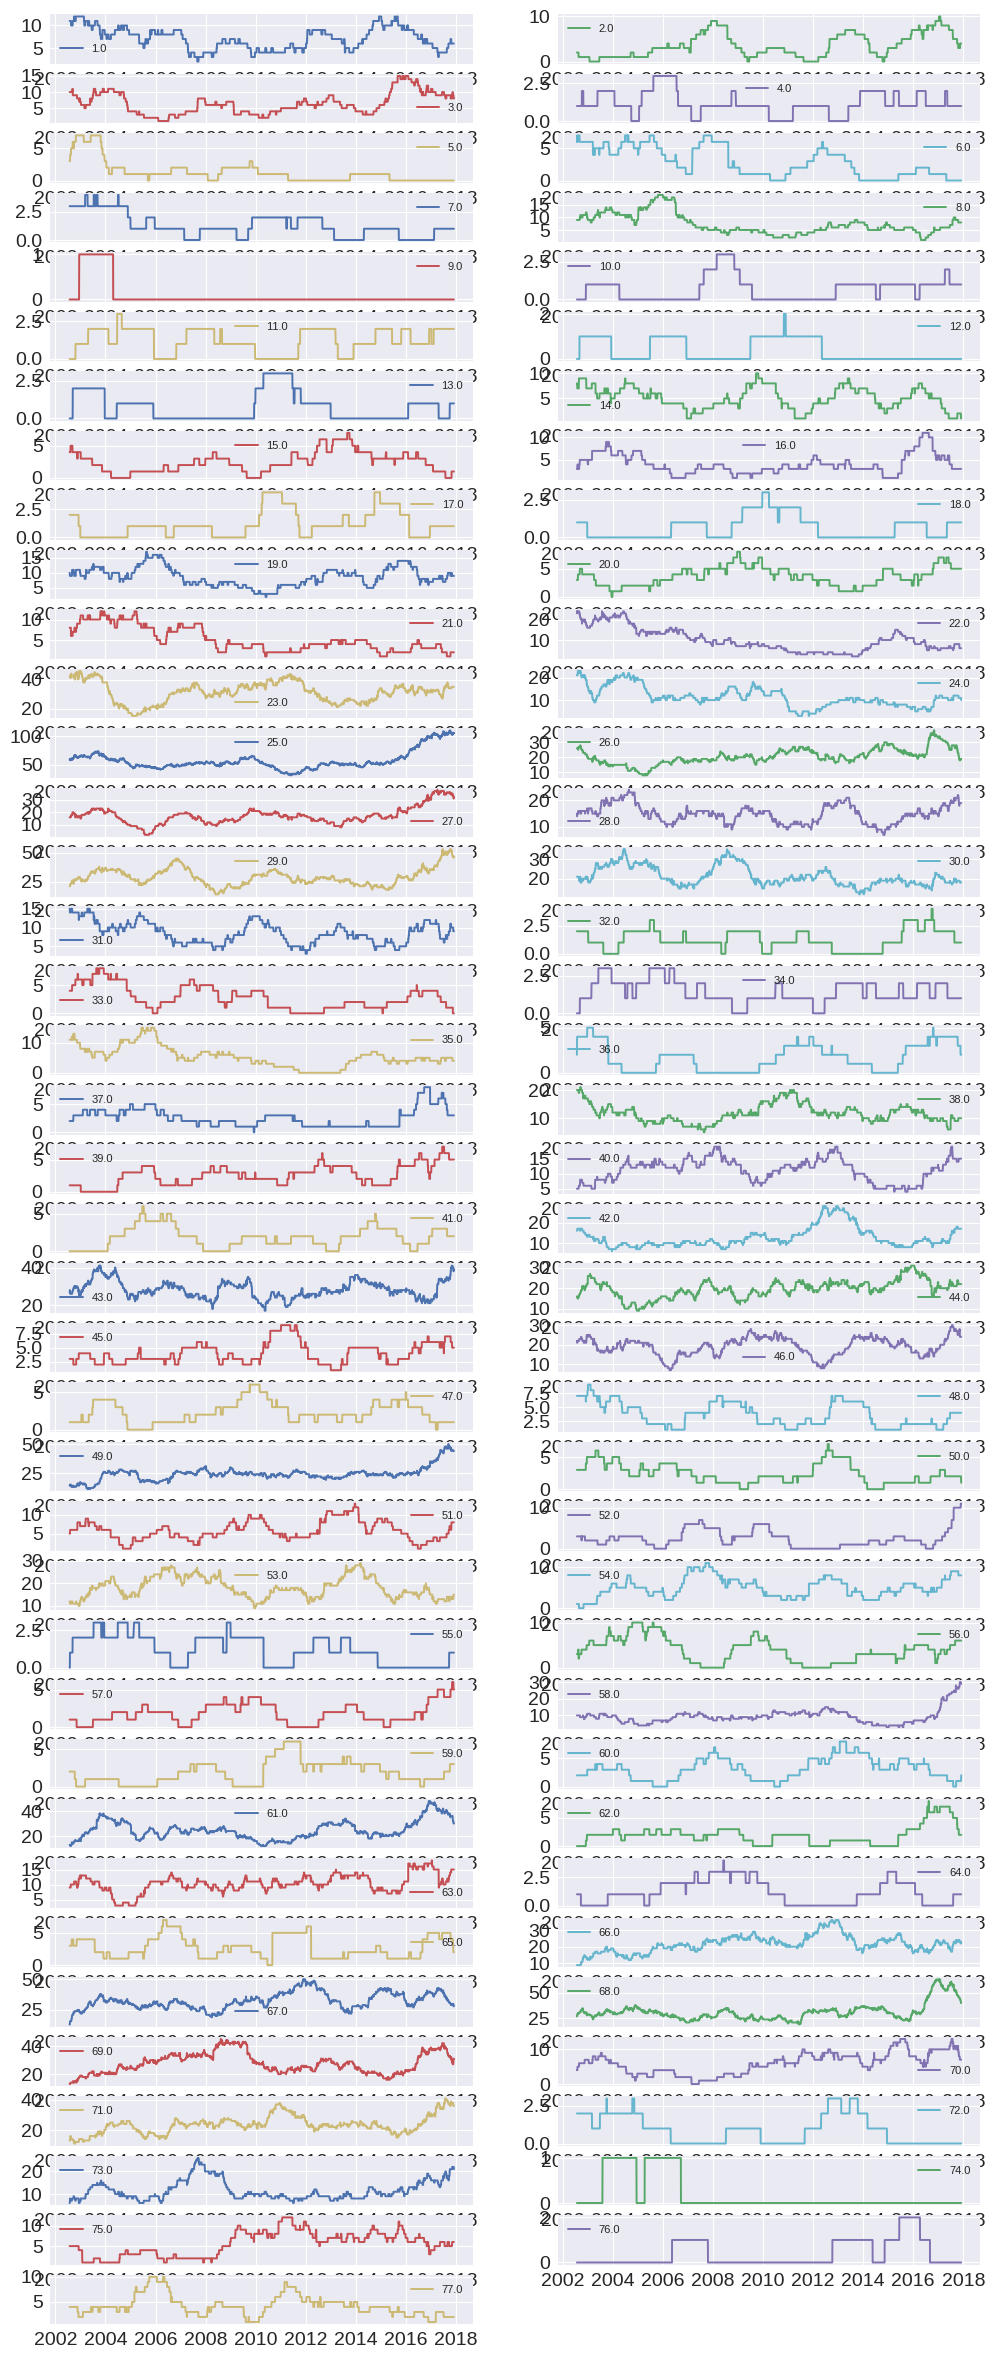

In [ ]:
crimes_count_date = homicide.pivot_table('ID', aggfunc=np.size, columns='Community Area', index=homicide.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 2), sharex=False, sharey=False)
plt.style.use(['seaborn-darkgrid'])